Original Stock Market Data:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-01-02  398.799988  399.359985  394.019989  397.970001  397.970001   
1  2014-01-03  398.290009  402.709991  396.220001  396.440002  396.440002   
2  2014-01-06  395.850006  397.000000  388.420013  393.630005  393.630005   
3  2014-01-07  395.040009  398.470001  394.290009  398.029999  398.029999   
4  2014-01-08  398.470001  403.000000  396.040009  401.920013  401.920013   

    Volume  
0  2137800  
1  2210200  
2  3170600  
3  1916000  
4  2316500  


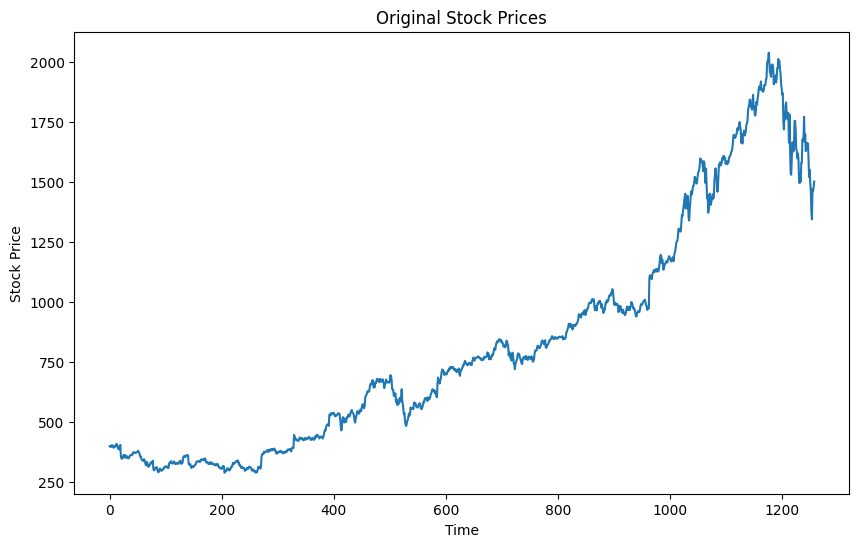

R-squared score: 0.9463921474755733
Mean Absolute Error (MAE): 34.93433637215008
Mean Squared Error (MSE): 2116.97937096842
Root Mean Squared Error (RMSE): 46.01064410512441
Mean Absolute Percentage Error (MAPE): 2.117251058793409


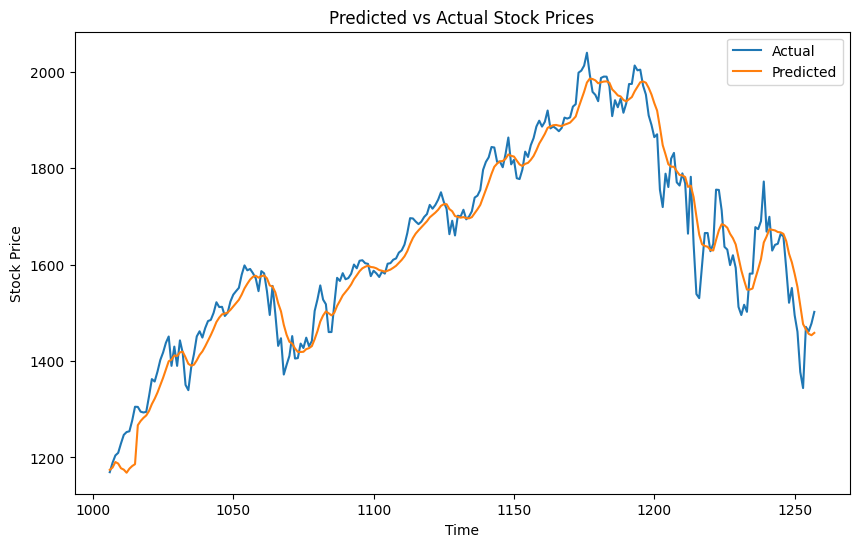

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv("AMZNtrain.csv")
# Display the original stock market data
print("Original Stock Market Data:")
print(data.head())

# Visualize the original stock prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Original Stock Prices')
plt.show()

# Preprocess the data
window_size = 10
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]['Close']
test_data = data.iloc[train_size:]['Close']

# Calculate the weighted moving average
weights = np.arange(1, window_size + 1)
weights = weights / weights.sum()

# Apply the weighted moving average for training data
train_pred = train_data.rolling(window=window_size).apply(lambda x: np.dot(x, weights), raw=True)

# Apply the weighted moving average for test data
test_pred = test_data.rolling(window=window_size).apply(lambda x: np.dot(x, weights), raw=True)

# Create the future predictions by combining the rolling window observations with the test predictions
future_pred = pd.concat([train_data.iloc[-window_size:], test_pred[window_size:]], ignore_index=True)

# Calculate the R-squared score
r2 = r2_score(test_data, future_pred)
print("R-squared score:", r2)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, future_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test_data, future_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (abs((test_data - test_pred) / test_data)).mean() * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize the predicted vs actual stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, future_pred.values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()
plt.show()